In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.ConvNet.ConvNet import *
from NN_library.AutoUnet.AutoUnet import *
from NN_library.ConvNet.train_ConvNet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda
Using device: cuda


Test U-Net

In [2]:
data = dataset_seq()
loaders = get_loaders(data, 1)

In [3]:
name = 'NN_library/ConvNet/ConvNet'
args = {'lr' : 0.001, 'epochs' : 20, 'dev' : dev, 'name' : name}
net = ConvNet(16)
net = load_network(net, args['name'], args)

In [4]:
L_stiff, L_shr = test(net, loaders, args)
L_shr = np.array(L_shr)
L_stiff = np.array(L_stiff)

In [5]:
shr_mean = L_shr.sum(axis=1).mean()
shr_std = L_shr.sum(axis=1).std()
stiff_mean = L_stiff.sum(axis=1).mean()
stiff_std = L_stiff.sum(axis=1).std()
print(shr_mean, shr_std)
print(stiff_mean, stiff_std)

0.04745571 0.02990437
0.0820287 0.050099984


In [6]:
shr_mean = np.mean(L_shr, axis=0)
shr_std = np.std(L_shr, axis=0)
stiff_mean = np.mean(L_stiff, axis=0)
stiff_std = np.std(L_stiff, axis=0)

In [7]:
print(shr_mean, '\n', shr_std)
print(stiff_mean, '\n', stiff_std)

[8.9453941e-08 4.3942934e-04 8.6706685e-04 1.4936175e-03 2.8381259e-03
 4.1884566e-03 5.1817386e-03 6.2831985e-03 7.6194517e-03 8.9400699e-03
 9.6044727e-03] 
 [3.4631437e-06 3.5431134e-04 7.0095289e-04 1.2528900e-03 2.2373328e-03
 3.1082756e-03 3.9457525e-03 4.7017210e-03 5.6679426e-03 6.6719255e-03
 7.2672069e-03]
[0.0000000e+00 3.0958519e-05 1.0987364e-03 5.4870420e-03 9.1103204e-03
 1.0502322e-02 1.0973485e-02 1.1360638e-02 1.1180440e-02 1.1212395e-02
 1.1072357e-02] 
 [0.0000000e+00 2.1896765e-05 1.0168235e-03 5.4045101e-03 7.9608923e-03
 8.6750044e-03 9.5031671e-03 9.8902415e-03 9.5832217e-03 9.8566441e-03
 1.0496555e-02]


Text(0, 0.5, 'Stiffness loss')

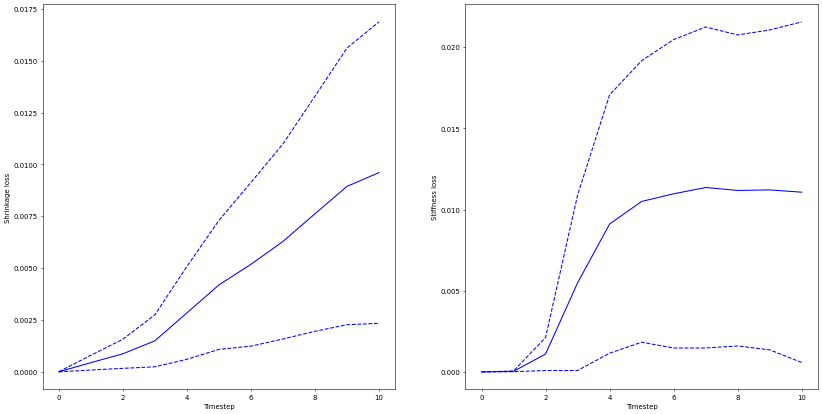

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=50)

axs.flat[0].plot(shr_mean, 'b')
axs.flat[0].plot(shr_mean+shr_std, 'b--')
axs.flat[0].plot(shr_mean-shr_std, 'b--')
axs.flat[0].set_xlabel('Timestep')
axs.flat[0].set_ylabel('Shrinkage loss')

axs.flat[1].plot(stiff_mean, 'b')
axs.flat[1].plot(stiff_mean+stiff_std, 'b--')
axs.flat[1].plot(stiff_mean-stiff_std, 'b--')
axs.flat[1].set_xlabel('Timestep')
axs.flat[1].set_ylabel('Stiffness loss')

In [9]:
unet = AutoUNet()
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet', args)

In [15]:
L_stiff, L_shr = test_w_Autonet(net, unet, loaders, args)
L_shr = np.array(L_shr)
L_stiff = np.array(L_stiff)
shr_mean = L_shr.sum(axis=1).mean()
shr_std = L_shr.sum(axis=1).std()
stiff_mean = L_stiff.sum(axis=1).mean()
stiff_std = L_stiff.sum(axis=1).std()
print(shr_mean, shr_std)
print(stiff_mean, stiff_std)

0.3615455 0.09621044
0.43406177 0.06869676


In [17]:
shr_mean = np.mean(L_shr, axis=0)
shr_std = np.std(L_shr, axis=0)
stiff_mean = np.mean(L_stiff, axis=0)
stiff_std = np.std(L_stiff, axis=0)
print(shr_mean, '\n', shr_std)
print(stiff_mean, '\n', stiff_std)

[8.5026569e-11 7.1741425e-02 7.0667543e-02 5.8852911e-02 4.5296367e-02
 3.6298670e-02 2.8325055e-02 2.0525867e-02 1.6233746e-02 1.3604056e-02] 
 [2.2736624e-09 6.1031124e-03 7.3422175e-03 1.1498321e-02 1.4083212e-02
 1.5592635e-02 1.6230132e-02 1.4416100e-02 1.2132473e-02 1.0854248e-02]
[0.         0.01686432 0.07260517 0.09851    0.0801935  0.05792177
 0.04138044 0.02896274 0.02162181 0.016002  ] 
 [0.         0.00557859 0.02402356 0.02145034 0.01706308 0.01898842
 0.01849597 0.01645319 0.01437761 0.01186016]


Text(0, 0.5, 'Stiffness loss')

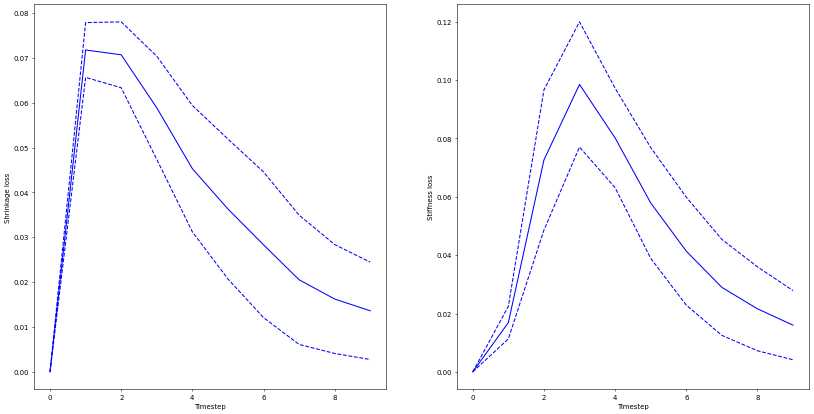

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=50)

axs.flat[0].plot(shr_mean, 'b')
axs.flat[0].plot(shr_mean+shr_std, 'b--')
axs.flat[0].plot(shr_mean-shr_std, 'b--')
axs.flat[0].set_xlabel('Timestep')
axs.flat[0].set_ylabel('Shrinkage loss')

axs.flat[1].plot(stiff_mean, 'b')
axs.flat[1].plot(stiff_mean+stiff_std, 'b--')
axs.flat[1].plot(stiff_mean-stiff_std, 'b--')
axs.flat[1].set_xlabel('Timestep')
axs.flat[1].set_ylabel('Stiffness loss')